In [38]:
import pandas as pd
df=pd.read_csv("GlobalLandTemperaturesByCity.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [39]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [40]:
df['dt']=pd.to_datetime(df['dt'])


In [41]:

df['AverageTemperature'].fillna(df['AverageTemperature'].mean(),inplace=True)
df['AverageTemperatureUncertainty'].fillna(df['AverageTemperatureUncertainty'].mean(),inplace=True)
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


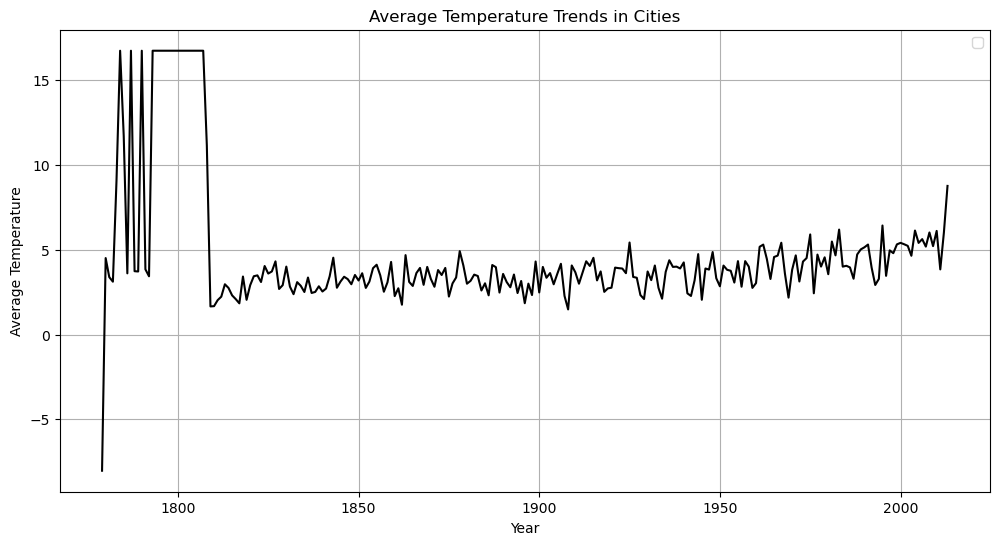

In [80]:


city_data=df[df['City']=='Aqtöbe'].copy()
city_data['Year']=city_data['dt'].dt.year
annual_avg_temp=city_data.groupby('Year')['AverageTemperature'].mean().reset_index()
plt.figure(figsize=(12,6))
plt.plot(annual_avg_temp['Year'],annual_avg_temp['AverageTemperature'],color='black')

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Trends in Cities')
plt.legend()
plt.grid(True)
plt.show()

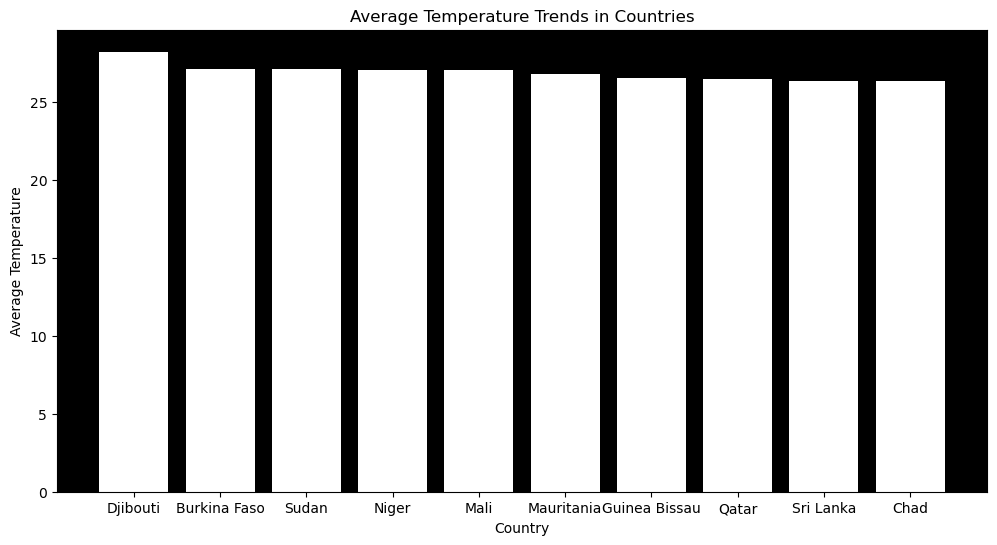

In [90]:


avg_temp = df.groupby('Country')["AverageTemperature"].mean().reset_index().sort_values(by='AverageTemperature', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(avg_temp['Country'], avg_temp['AverageTemperature'], color='white')

ax.set_facecolor('black')
ax.set_xlabel('Country')
ax.set_ylabel('Average Temperature')
ax.set_title('Average Temperature Trends in Countries')

plt.show()


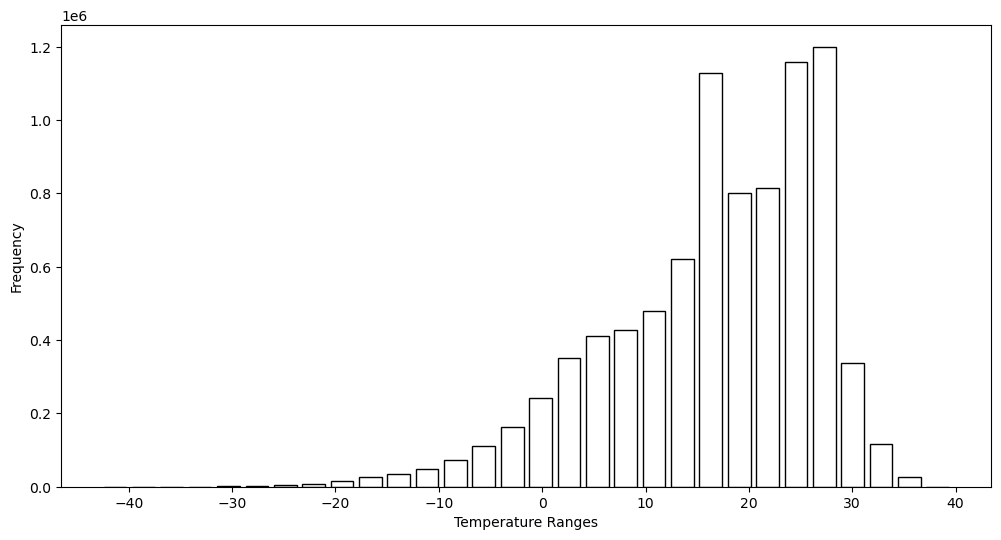

In [76]:
plt.figure(figsize=(12,6))
plt.hist(df['AverageTemperature'],bins=30,rwidth=0.8,color='white',edgecolor='black')
plt.xlabel('Temperature Ranges')
plt.ylabel('Frequency')
plt.show()

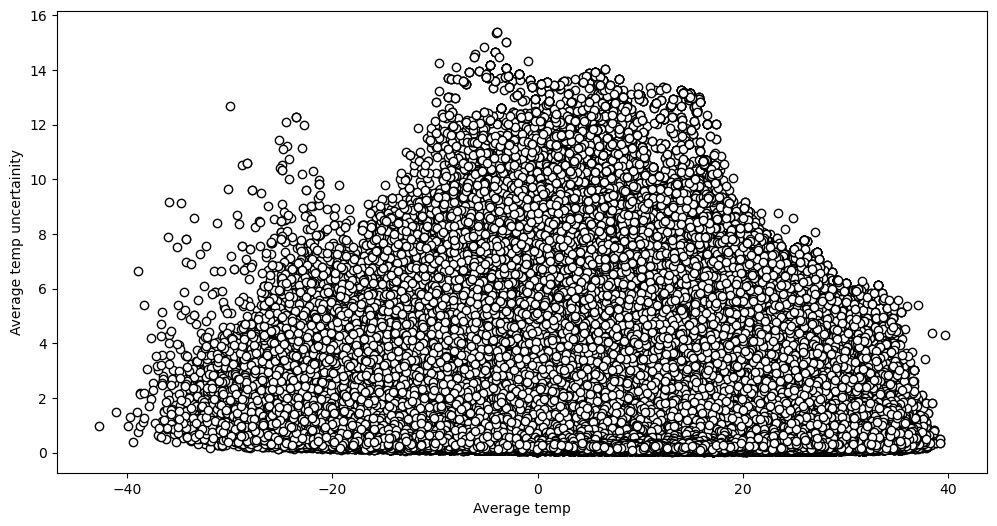

In [96]:
plt.figure(figsize=(12,6))
plt.scatter(df['AverageTemperature'],df['AverageTemperatureUncertainty'],color='white',edgecolor='black')
plt.xlabel('Average temp')
plt.ylabel('Average temp uncertainity')
plt.show()

C:\Users\CVR\AppData\Local\Temp\ipykernel_17144\4291059289.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spread['Years'] = spread['dt'].dt.year


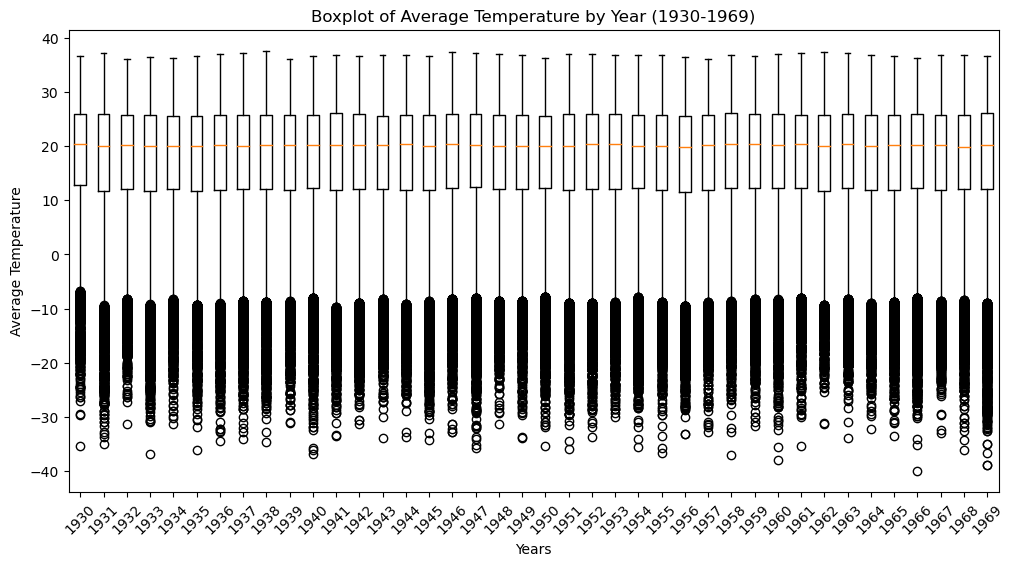

In [100]:
spread = df[(df['dt'] > '1930-01-01') & (df['dt'] < '1969-12-31')]

spread['Years'] = spread['dt'].dt.year

plt.figure(figsize=(12, 6))
plt.boxplot([spread['AverageTemperature'][spread['Years'] == year] for year in spread['Years'].unique()], 
            labels=spread['Years'].unique())

plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.title("Boxplot of Average Temperature by Year (1930-1969)")
plt.xticks(rotation=45) 
plt.show()

In [106]:
country_data = df[df["Country"] == 'India'].copy()
country_data['Year'] = country_data['dt'].dt.year
grouped_data = [group['AverageTemperature'] for _, group in country_data.groupby('Year')]


In [111]:
import seaborn as sns
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


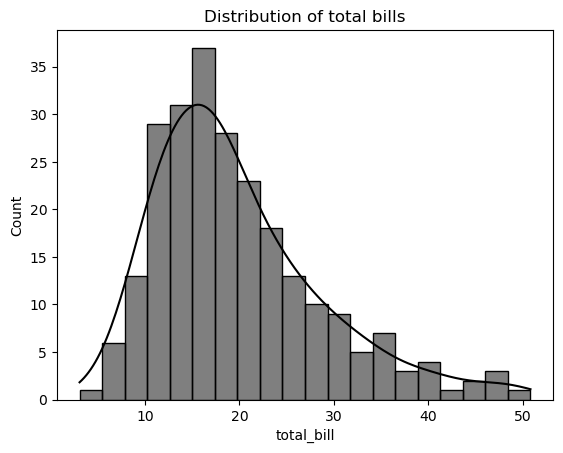

In [118]:
sns.histplot(data=tips, x="total_bill",kde=True,bins=20,color="#000000")
plt.title("Distribution of total bills")
plt.show()

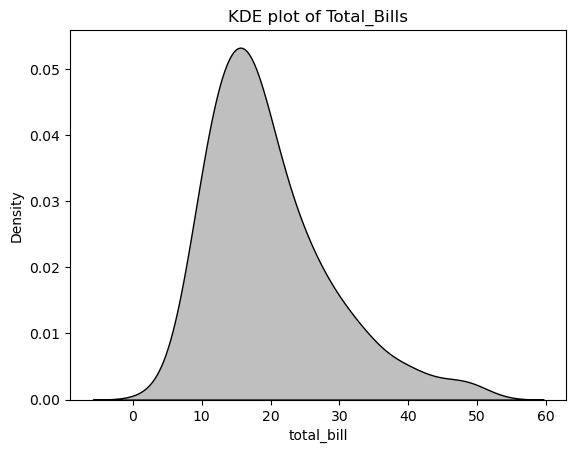

In [130]:
sns.kdeplot(data=tips,x="total_bill",color='black',fill=True)
plt.title('KDE plot of Total_Bills')
plt.show()

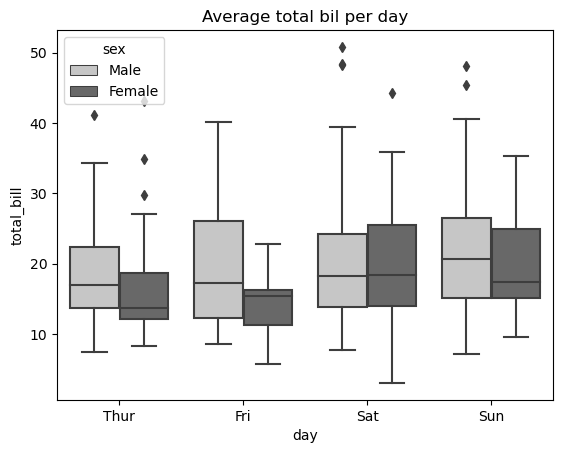

In [136]:
sns.boxplot(data=tips,x="day",y="total_bill",hue="sex",palette='Greys')
plt.title('Average total bil per day')
plt.show()

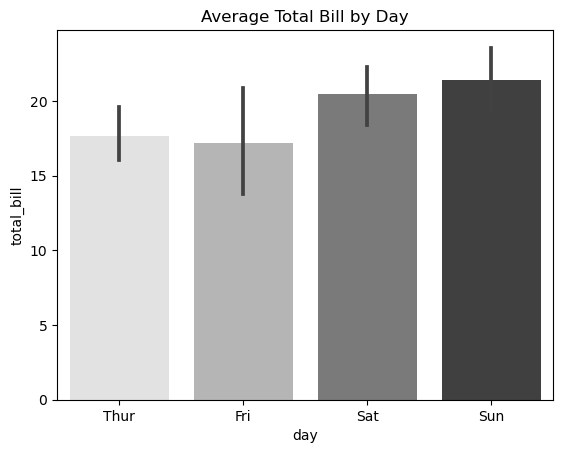

In [137]:
sns.barplot(data=tips,x='day',y="total_bill",palette="Greys")
plt.title("Average Total Bill by Day")
plt.show()

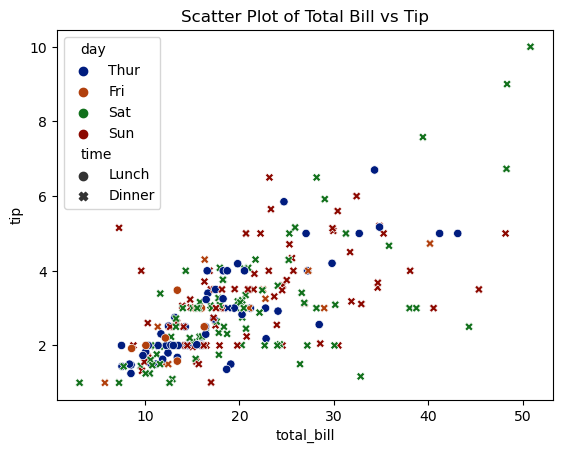

In [142]:
sns.scatterplot(data=tips,x="total_bill",y="tip",hue="day",style="time",palette="dark")
plt.title("Scatter Plot of Total Bill vs Tip")
plt.show()

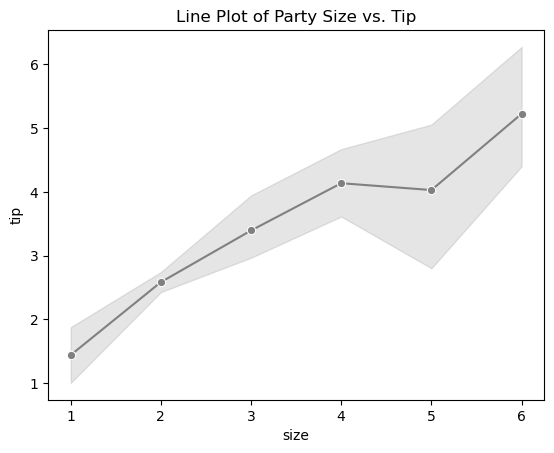

In [144]:
sns.lineplot(data=tips,x="size",y="tip",marker="o",color="grey")
plt.title("Line Plot of Party Size vs. Tip")
plt.show()

C:\Users\CVR\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


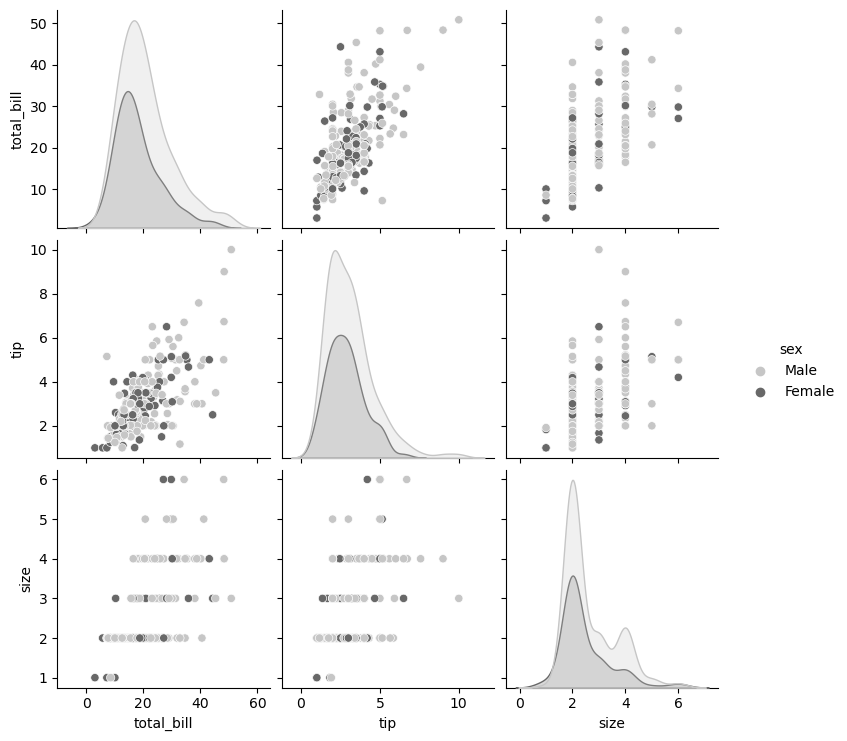

In [150]:

sns.pairplot(data=tips,hue="sex",palette="Greys")
plt.show()

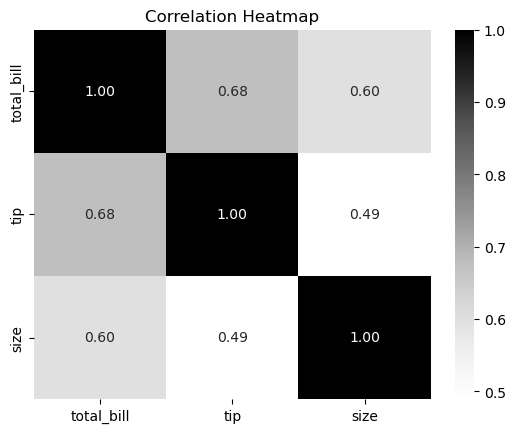

In [149]:
numeric_tips = tips.select_dtypes(include=['number'])
corr_matrix = numeric_tips.corr()
sns.heatmap(corr_matrix, annot=True, cmap='Greys', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()